In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
np.random.seed(42)

# synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=5,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=42,
)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

Y_train_encoded = one_hot_encode(Y_train, num_classes=5)
Y_test_encoded = one_hot_encode(Y_test, num_classes=5)

In [63]:
def sigmoid(x, der=False):
    if der:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

In [64]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [65]:
class NeuralNetwork:
    def __init__(self):
        self.input_neurons = 20
        self.hidden_neurons_1 = 32
        self.hidden_neurons_2 = 16
        self.hidden_neurons_3 = 8
        self.output_neurons = 5
        self.learning_rate = 0.01

        # weights
        self.W1 = np.random.randn(self.input_neurons, self.hidden_neurons_1)
        self.W2 = np.random.randn(self.hidden_neurons_1, self.hidden_neurons_2)
        self.W3 = np.random.randn(self.hidden_neurons_2, self.hidden_neurons_3)
        self.W4 = np.random.randn(self.hidden_neurons_3, self.output_neurons)

    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W1)
        self.A1 = sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2)
        self.A2 = sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3)
        self.A3 = sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W4)
        self.output = softmax(self.Z4)

        return self.output

    def backPropagation(self, X, Y, output):
        error = output - Y

        dW4 = np.dot(self.A3.T, error)
        dW3 = np.dot(self.A2.T, np.dot(error, self.W4.T) * sigmoid(self.A3, der=True))
        dW2 = np.dot(self.A1.T, np.dot(np.dot(error, self.W4.T) * sigmoid(self.A3, der=True), self.W3.T) * sigmoid(self.A2, der=True))
        dW1 = np.dot(X.T, np.dot(np.dot(np.dot(error, self.W4.T) * sigmoid(self.A3, der=True), self.W3.T) * sigmoid(self.A2, der=True), self.W2.T) * sigmoid(self.A1, der=True))

        # Update weights
        self.W4 -= self.learning_rate * dW4
        self.W3 -= self.learning_rate * dW3
        self.W2 -= self.learning_rate * dW2
        self.W1 -= self.learning_rate * dW1

    def train(self, X, Y, epochs):
        errors = []
        for epoch in range(epochs):
            output = self.feedForward(X)
            self.backPropagation(X, Y, output)

            loss = -np.mean(np.sum(Y * np.log(output + 1e-9), axis=1))
            errors.append(loss)

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")

        return errors

In [66]:
NN = NeuralNetwork()

epochs = 10000
errors = NN.train(X_train, Y_train_encoded, epochs)

Epoch 0/10000 - Loss: 2.1116
Epoch 1000/10000 - Loss: 0.0019
Epoch 2000/10000 - Loss: 0.0007
Epoch 3000/10000 - Loss: 0.0004
Epoch 4000/10000 - Loss: 0.0002
Epoch 5000/10000 - Loss: 0.0002
Epoch 6000/10000 - Loss: 0.0001
Epoch 7000/10000 - Loss: 0.0001
Epoch 8000/10000 - Loss: 0.0001
Epoch 9000/10000 - Loss: 0.0001


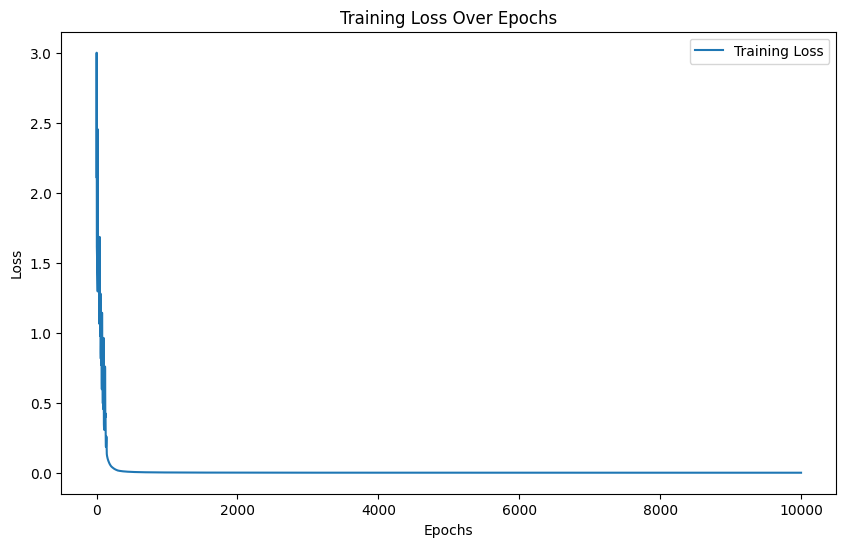

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(errors, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

In [68]:
predictions = np.argmax(NN.feedForward(X_test), axis=1)
accuracy = np.mean(predictions == Y_test.flatten())
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 80.00%


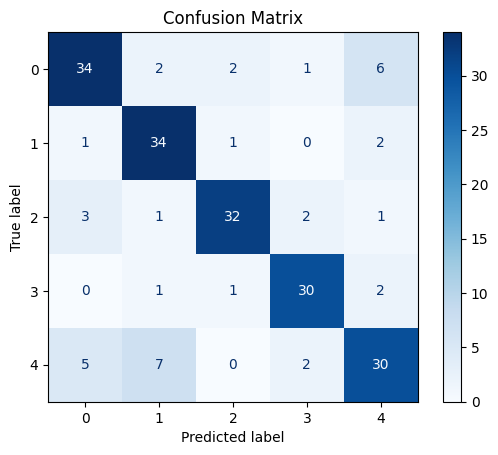

In [69]:
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [70]:
print("Sample Predictions:")
for i in range(5):
    probs = NN.feedForward([X_test[i]])[0]
    print(f"Input: {X_test[i]}, Probabilities: {probs}, Prediction: {np.argmax(probs)}, Actual: {Y_test[i]}")

Sample Predictions:
Input: [ -1.67320606  -0.23774181   0.72559875  -0.55704193  -5.58607867
   3.1878913   -0.36825876   4.54109628  -1.72173634  -0.83377953
  -1.0683717  -10.33698659  -1.0275724    2.35665715  -1.74170457
   3.1187607   -3.74009973   1.47932603  -4.66699483  -0.48183943], Probabilities: [3.88269522e-05 4.25564264e-06 2.15828166e-10 6.81174074e-09
 9.99956910e-01], Prediction: 4, Actual: 4
Input: [  3.27299762  -0.99195028  -0.03711134  -1.96565004   4.26136734
   2.40596334  -0.40985864   7.78400889  -7.71974391   0.35310078
   0.19589638 -14.12836485  -5.03186561  -6.21069018  -6.84202153
   1.01561574  -2.16585922  -4.3985182   -2.6801046    1.74511356], Probabilities: [6.65884095e-06 2.11578824e-07 4.70329012e-08 9.99993038e-01
 4.48144835e-08], Prediction: 3, Actual: 3
Input: [ 1.92257418  2.12674786  0.69211272  3.64172352  3.51096432 -5.37037388
 -0.01006303 -0.78688598  1.16798002  0.2628573  -3.53539682 -7.43894873
 -4.05721052 -0.36848042  0.47739248  4.185